In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
import time
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
import seaborn as Sb

# Importing and Setting Data

In [282]:
df=pd.read_csv('Desktop/2nd Sem/ML/Projects 1/sgemm_product_dataset/sgemm_product.csv')
df = df.iloc[0:20000, :]

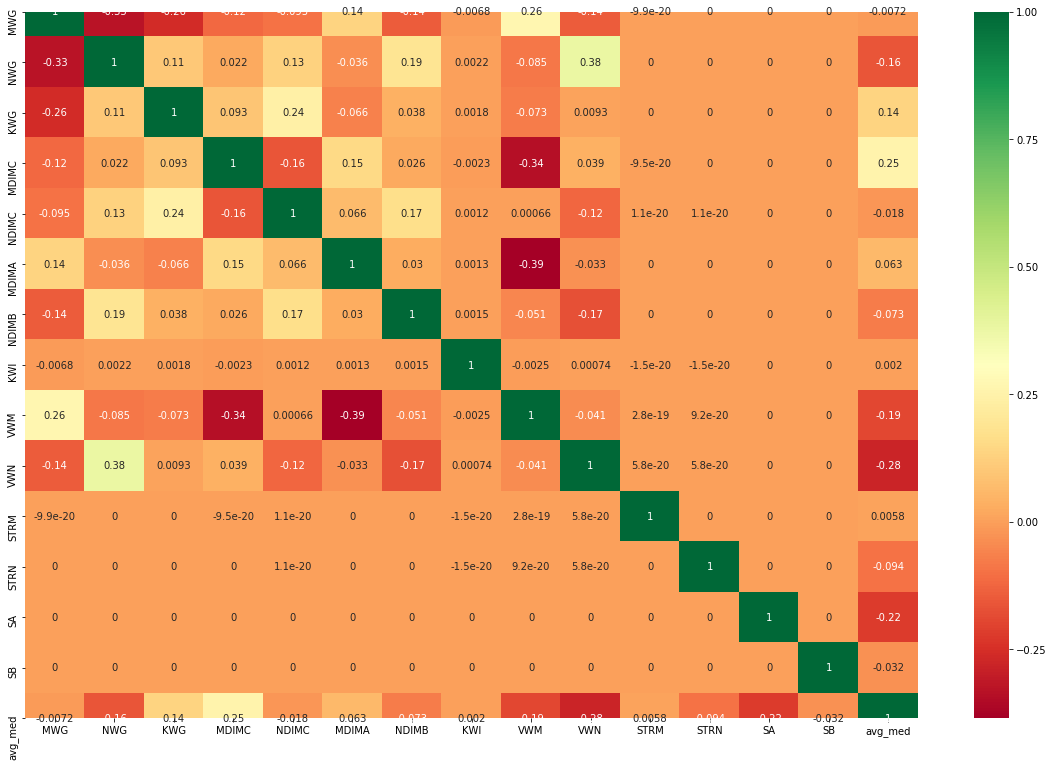

In [326]:
# Get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,13))
g=Sb.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [327]:
corr = df.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14]].corr().round(4)
corr.style.background_gradient(cmap='RdYlGn', axis= None).set_precision(2)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,avg_med
MWG,1,-0.33,-0.26,-0.12,-0.095,0.14,-0.14,-0.0068,0.26,-0.14,-0.0072
NWG,-0.33,1,0.11,0.022,0.13,-0.036,0.19,0.0022,-0.085,0.38,-0.16
KWG,-0.26,0.11,1,0.093,0.24,-0.066,0.038,0.0018,-0.073,0.0093,0.14
MDIMC,-0.12,0.022,0.093,1,-0.16,0.15,0.026,-0.0023,-0.34,0.038,0.25
NDIMC,-0.095,0.13,0.24,-0.16,1,0.066,0.17,0.0012,0.0007,-0.12,-0.018
MDIMA,0.14,-0.036,-0.066,0.15,0.066,1,0.03,0.0013,-0.39,-0.033,0.063
NDIMB,-0.14,0.19,0.038,0.026,0.17,0.03,1,0.0015,-0.051,-0.17,-0.073
KWI,-0.0068,0.0022,0.0018,-0.0023,0.0012,0.0013,0.0015,1,-0.0025,0.0007,0.002
VWM,0.26,-0.085,-0.073,-0.34,0.0007,-0.39,-0.051,-0.0025,1,-0.041,-0.19
VWN,-0.14,0.38,0.0093,0.038,-0.12,-0.033,-0.17,0.0007,-0.041,1,-0.28


In [283]:
df.head()
df['avg']=df.iloc[:,14:].mean(axis=1)
df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1,inplace=True)
df['avg_med']=df['avg'].median()
df.loc[df['avg']>= df['avg_med'],'avg_med']=1
df.loc[df['avg']< df['avg_med'],'avg_med']=0

In [284]:
df.drop(['avg'],axis=1,inplace=True)

In [285]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_med
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,16.844800,76.902400,24.72960,10.547200,14.01600,11.545600,16.499200,4.995200,1.246400,2.39120,0.500000,0.500000,0.500000,0.500000,0.500000
std,3.578233,43.791195,7.96686,3.726938,7.73705,4.343554,9.177963,3.000071,0.483424,1.93079,0.500013,0.500013,0.500013,0.500013,0.500013
min,16.000000,16.000000,16.00000,8.000000,8.00000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,32.000000,16.00000,8.000000,8.00000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,64.000000,32.00000,8.000000,16.00000,8.000000,16.000000,2.000000,1.000000,2.00000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,16.000000,128.000000,32.00000,16.000000,16.00000,16.000000,16.000000,8.000000,1.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,32.000000,128.000000,32.00000,16.000000,32.00000,32.000000,32.000000,8.000000,4.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [287]:
# Data split in test and train
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:14],df['avg_med'] , test_size=0.3, random_state=100)

In [298]:
#scaling data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Accuracy plots

In [288]:
#Accuracy
def plot_accuracy(parameters,train_acc,test_acc,title,xlab,ylab):
    plt.plot(parameters,train_acc,marker='o',markersize=5,color='black',label='train')
    plt.plot(parameters,test_acc,marker='o',markersize=5,color='purple',label='test')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.legend(loc='upper right')
    plt.show()

# Run time plots

In [289]:
#Run time Plots
def plot_runtime(parameters,run_time,title,xlab,ylab):
    plt.plot(parameters,run_time,marker='o',markersize=5,color='green')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.show()

# SVM

# Accuracy vs kernals

In [299]:
# Accuracy vs kernals
kernels = ['linear', 'poly', 'rbf','sigmoid']
ker_acc_train = []
ker_acc_test = []
ker_run_time = []
for i in range(0, len(kernels)):
    start_time = time.time()
    SVM=SVC(kernel= kernels[i],random_state=5)
    SVM.fit(x_train,y_train)
    end_time = time.time()
    run_time = end_time - start_time
    y_train_pred = SVM.predict(x_train)
    y_test_pred = SVM.predict(x_test)
    sc1=accuracy_score(y_train,y_train_pred)
    sc2=accuracy_score(y_test,y_test_pred)
    ker_acc_train.append(sc1)
    ker_acc_test.append(sc2)
    ker_run_time.append(run_time)

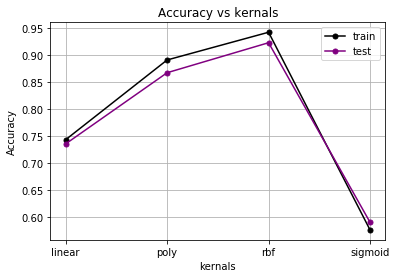

In [300]:
plot_accuracy(kernels,ker_acc_train,ker_acc_test,"Accuracy vs kernals","kernals","Accuracy")

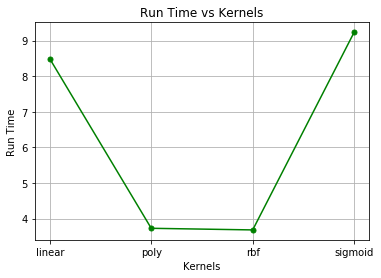

In [301]:
plot_runtime(kernels,ker_run_time,'Run Time vs Kernels','Kernels','Run Time')

In [302]:
SVM

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=5,
    shrinking=True, tol=0.001, verbose=False)

# Accuracy vs Polynomial

In [303]:
# Accuracy vs Polynomial
deg_poly=np.arange(1,11,1)
poly_run_time=[]
poly_acc_train=[]
poly_acc_test=[]
for i in deg_poly:
    print("--degree:",i,"--")
    start_time = time.time()
    SVM2=SVC(degree=i,kernel='poly',random_state=5)
    SVM2.fit(x_train,y_train)
    end_time = time.time()
    run_time = end_time - start_time
    y_train_pred = SVM2.predict(x_train)
    y_test_pred = SVM2.predict(x_test)
    py1=accuracy_score(y_train,y_train_pred)
    py2=accuracy_score(y_test,y_test_pred)
    poly_acc_train.append(py1)
    poly_acc_test.append(py2)
    poly_run_time.append(run_time)
    

--degree: 1 --
--degree: 2 --
--degree: 3 --
--degree: 4 --
--degree: 5 --
--degree: 6 --
--degree: 7 --
--degree: 8 --
--degree: 9 --
--degree: 10 --


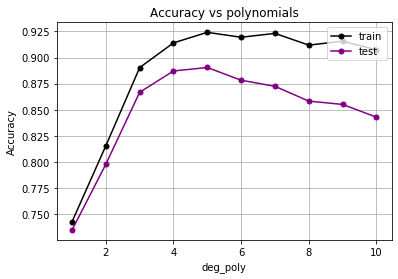

In [328]:
plot_accuracy(deg_poly,poly_acc_train,poly_acc_test,"Accuracy vs polynomials","deg_poly","Accuracy")

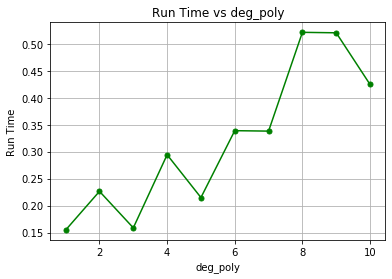

In [245]:
plot_runtime(deg_poly,poly_run_time,'Run Time vs deg_poly','deg_poly','Run Time')# gamme=scale

# K fold Cross Validation

In [305]:
# K fold Cross Validation
from sklearn.model_selection import cross_val_score
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
folds = list(range(2,12,2))
accuracy_kernel_folds = []
accuracy_folds = []
for i in range(len(kernels)):
    print("---- Running Cross validation for kernel : ", kernels[i], "----")
    for j in range(len(folds)):
        print("---- Running Cross validation for folds : ", folds[j], "----")
        cross_valid = cross_val_score(estimator = SVC(kernel = kernels[i],gamma = 'auto',random_state = 5), 
                                   X = x_train, y = y_train, cv = folds[j])
        
        accuracy_folds.append(cross_valid.mean())
    
    accuracy_kernel_folds.append(accuracy_folds)
    accuracy_folds = []

---- Running Cross validation for kernel :  linear ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  poly ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  rbf ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  sigmoid ----
---- Running Cross validati

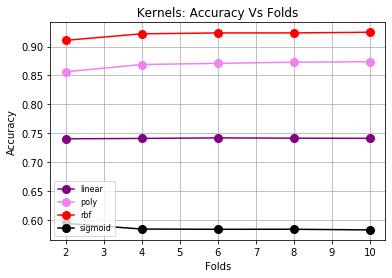

In [306]:
# Plotting the mean accuracies found from cross validtion and test set accuracy
colors = ['purple', 'violet', 'red', 'black']
for i in range(len(kernels)):
    plt.plot(folds, accuracy_kernel_folds[i] , marker ='o', markersize = 8 , color =colors[i],label=kernels[i])

plt.title(" Kernels: Accuracy Vs Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend(prop={'size': 8})
plt.show()

# Accuracy vs Gamma

In [307]:
# Accuracy vs Gamma
gamma_values = ['auto', 1, 10, 100]
gamma_acc_train = []
gamma_acc_test = []
gamma_run_time = []
for i in range(len(gamma_values)):
    print("---- SVM with rbf kernal for gamma value :", gamma_values[i], "----")
    start = time.time()
    gama_svm = SVC(kernel= 'rbf' ,gamma= gamma_values[i], random_state=5)
    gama_svm.fit(x_train , y_train)
    gamma_run_time.append(time.time() - start)
    y2_pred_train = gama_svm.predict(x_train)
    y2_pred_test = gama_svm.predict(x_test)
    gamma_acc_train.append(accuracy_score(y_train,y2_pred_train))
    gamma_acc_test.append(accuracy_score(y_test,y2_pred_test))

---- SVM with rbf kernal for gamma value : auto ----
---- SVM with rbf kernal for gamma value : 1 ----
---- SVM with rbf kernal for gamma value : 10 ----
---- SVM with rbf kernal for gamma value : 100 ----


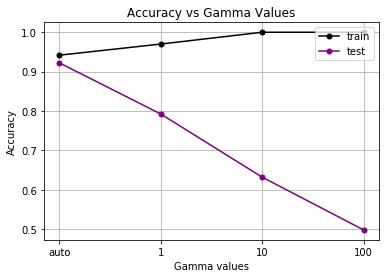

In [308]:
plot_accuracy(gamma_values,gamma_acc_train, gamma_acc_test,
             "Accuracy vs Gamma Values", 'Gamma values', 'Accuracy')

# Decision Tree

In [290]:
# Accuracy vs criterion 
det_cri=['gini','entropy']
det_acc_train=[]
det_acc_test=[]
det_acc_time=[]
for i in range(0,len(det_cri)):
    start_time=time.time()
    det = DecisionTreeClassifier(criterion=det_cri[i],random_state=5)
    det.fit(x_train,y_train)
    end_time=time.time()
    run_time=end_time-start_time
    Y_train_predict=det.predict(x_train)
    Y_test_predict=det.predict(x_test)
    Y_acc_train=accuracy_score(y_train,Y_train_predict)
    Y_acc_test=accuracy_score(y_test,Y_test_predict)
    det_acc_train.append(Y_acc_train)
    det_acc_test.append(Y_acc_test)
    det_acc_time.append(run_time)

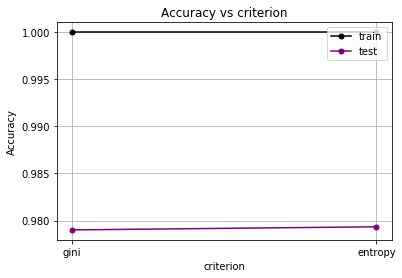

In [291]:
plot_accuracy(det_cri,det_acc_train,det_acc_test,"Accuracy vs criterion","criterion","Accuracy")

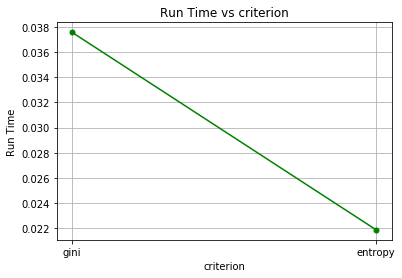

In [292]:
plot_runtime(det_cri,det_acc_time,'Run Time vs criterion','criterion','Run Time')

In [293]:
# Accuracy vs depth
#det_cri=['gini','entropy']
acc_depth=(1,10,1)
depth_acc_train=[]
depth_acc_test=[]
depth_acc_time=[]
#det2_acc_train=[]
#det2_acc_test=[]
#for i in range(0,len(det_cri)):
for j in range(0,len(acc_depth)):
    start_time=time.time()
    det_depth = DecisionTreeClassifier(max_depth=acc_depth[j],random_state=5)
    det_depth.fit(x_train,y_train)
    end_time=time.time()
    run_time=end_time-start_time
    Y_train_predict2=det_depth.predict(x_train)
    Y_test_predict2=det_depth.predict(x_test)
    Y_acc_train2=accuracy_score(y_train,Y_train_predict2)
    Y_acc_test2=accuracy_score(y_test,Y_test_predict2)
    depth_acc_train.append(Y_acc_train2)
    depth_acc_test.append(Y_acc_test2)
    depth_acc_time.append(run_time)

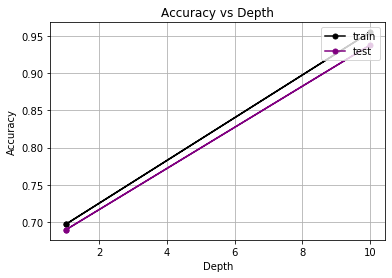

In [294]:
plot_accuracy(acc_depth,depth_acc_train,depth_acc_test,"Accuracy vs Depth","Depth","Accuracy")

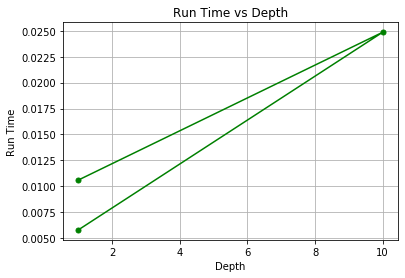

In [295]:
plot_runtime(acc_depth,depth_acc_time,'Run Time vs Depth','Depth','Run Time')

In [296]:
# Accuracy vs Tree depth in 
metric = ['gini', 'entropy']
depth = np.arange(5,20,1)
depth_acc_train = []
depth_acc_test = []
metric_acc_train = []
metric_acc_test = []
for i in range(len(metric)):
    for j in range(len(depth)):   
        dtree = DecisionTreeClassifier(criterion=metric[i] ,max_depth=depth[j],  random_state= 5 )
        #print(depth[j])
        dtree.fit(x_train , y_train)
        y_pred_train = dtree.predict(x_train)
        y_pred_test = dtree.predict(x_test)
        depth_acc_train.append(round(accuracy_score(y_train,y_pred_train),4))
        depth_acc_test.append(round(accuracy_score(y_test,y_pred_test),4))
        #print(depth_acc_train)
        #print(depth_acc_test)
    
    metric_acc_train.append(depth_acc_train)
    metric_acc_test.append(depth_acc_test)
    depth_acc_train = []
    depth_acc_test = []

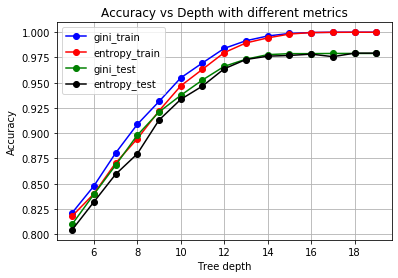

In [297]:
plt.plot(depth,metric_acc_train[0],marker='o',markersize=6,color='blue',label='gini_train')
plt.plot(depth,metric_acc_train[1],marker='o',markersize=6,color='red',label='entropy_train')
plt.plot(depth,metric_acc_test[0],marker='o',markersize=6,color='green',label='gini_test')
plt.plot(depth,metric_acc_test[1],marker='o',markersize=6,color='black',label='entropy_test')
plt.title('Accuracy vs Depth with different metrics')
plt.xlabel('Tree depth')
plt.grid()
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Boosting

# Experimentation with depth

In [309]:
# Experimentation with depth
boost_depth = np.arange(5,25,2)
boost_train = []
boost_test = []
for i in boost_depth:   
    boost = XGBClassifier(max_depth=i,random_state= 5 )
    boost.fit(x_train,y_train)
    y_pred_train = boost.predict(x_train)
    y_pred_test = boost.predict(x_test)
    boost_train.append(accuracy_score(y_train,y_pred_train))
    boost_test.append(accuracy_score(y_test,y_pred_test))

In [310]:
boost_train

[0.9500714285714286,
 0.9826428571428572,
 0.9952142857142857,
 0.9972142857142857,
 0.9975,
 0.9974285714285714,
 0.9974285714285714,
 0.9974285714285714,
 0.9974285714285714,
 0.9974285714285714]

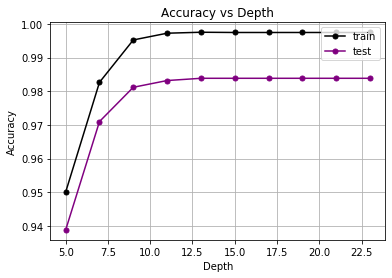

In [311]:
plot_accuracy(boost_depth,boost_train,boost_test,"Accuracy vs Depth","Depth","Accuracy")

# Experimentation with boosting levels 

In [312]:
# Accuracy vs boosting levels
boost_level = np.arange(1,100,20)
acc_boost_train = []
acc_boost_test = []
for i in boost_level:   
    boost_level2 = XGBClassifier(n_estimators = i,random_state= 5)
    boost_level2.fit(x_train,y_train)
    y_pred_boost_train = boost_level2.predict(x_train)
    y_pred_boost_test = boost_level2.predict(x_test)
    acc_boost_train.append(accuracy_score(y_train,y_pred_boost_train))
    acc_boost_test.append(accuracy_score(y_test,y_pred_boost_test))

In [313]:
acc_boost_test

[0.746, 0.8043333333333333, 0.8368333333333333, 0.8545, 0.8596666666666667]

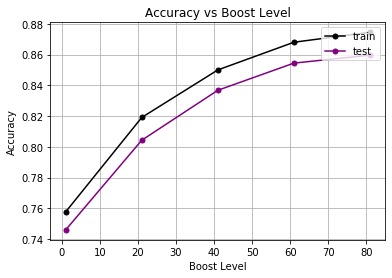

In [314]:
plot_accuracy(boost_level,acc_boost_train,acc_boost_test,'Accuracy vs Boost Level','Boost Level','Accuracy')

# Experimentation with learning rate parameter

In [315]:
# Accuracy vs Learning Rate
learning_rate =(0.001,0.01,0.1,0.5)
acc__learningrate_train = []
acc_learningrate_test = []
for i in range(0,len(learning_rate)):
    learning_rate2 = XGBClassifier(learning_rate=learning_rate[i],random_state=5)
    learning_rate2.fit(x_train,y_train)
    y_pred_learning_rate_train = learning_rate2.predict(x_train)
    y_pred_learning_rate_test = learning_rate2.predict(x_test)
    acc__learningrate_train.append(accuracy_score(y_train,y_pred_learning_rate_train))
    acc_learningrate_test.append(accuracy_score(y_test,y_pred_learning_rate_test))

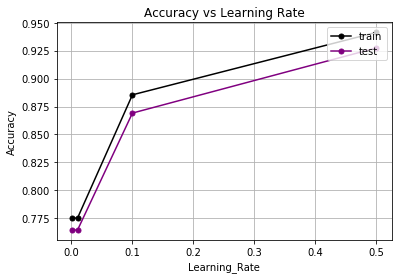

In [316]:
plot_accuracy(learning_rate,acc__learningrate_train,acc_learningrate_test,'Accuracy vs Learning Rate','Learning_Rate','Accuracy')

In [317]:
Boosted_tree = XGBClassifier(max_depth = 10,random_state = 5,n_estimators = 80,learning_rate = 0.5)
Boosted_tree.fit(x_train,y_train)
y_pred_Boosted_tree = Boosted_tree.predict(x_test)
### confusion matrix
CM_BT_C = confusion_matrix(y_test,y_pred_Boosted_tree)
print(CM_BT_C) 
accuracy_BT2 = accuracy_score(y_test,y_pred_Boosted_tree)
accuracies_bt_2 = cross_val_score(estimator = Boosted_tree, X = x_train,y = y_train,cv = 10)
mean_acc_bt_2 = accuracies_bt_2.mean()

[[2955   32]
 [  56 2957]]


In [318]:
# Applying k-Fold Cross Validation on TRAIN dataset
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
folds = list(range(2,12,2))
mean_accuracy_kernel_folds = []
mean_accuracy_folds = []


for i in range(len(kernels)):
    print("---- Running Cross validation for kernel : ", kernels[i], "----")
    for j in range(len(folds)):
        print("---- Running Cross validation for folds : ", folds[j], "----")
        score = cross_val_score(estimator = SVC(kernel = kernels[i], gamma = 'auto', random_state = 5), 
                                   X = x_train, y = y_train, cv = folds[j])
        
        mean_accuracy_folds.append(score.mean())
    
    mean_accuracy_kernel_folds.append(mean_accuracy_folds)
    mean_accuracy_folds = []

---- Running Cross validation for kernel :  linear ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  poly ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  rbf ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  sigmoid ----
---- Running Cross validati

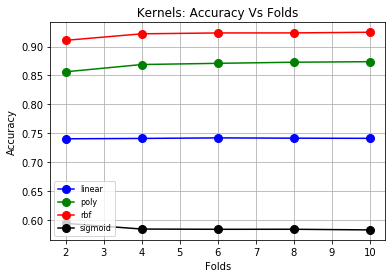

In [319]:
# Plotting the mean accuracies found from cross validtion and test set accuracy
colors = ['blue', 'green', 'red', 'black']
for i in range(len(kernels)):
    plt.plot(folds , mean_accuracy_kernel_folds[i] , marker ='o', markersize = 8 , color =colors[i],label=kernels[i])

plt.title(" Kernels: Accuracy Vs Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend(prop={'size': 8})
plt.show()

In [320]:
# Applying k-Fold Cross Validation
# Number of folds = 10
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mean_accuracy_kernels = []

for i in range(len(kernels)): 
    print("---- Running Cross validation for kernel : ", kernels[i], "----")
    score = cross_val_score(estimator = SVC(kernel = kernels[i], gamma = 'auto', random_state = 5), 
                               X = x_train, y = y_train, cv = 10)
    mean_accuracy_kernels.append(score.mean())

---- Running Cross validation for kernel :  linear ----
---- Running Cross validation for kernel :  poly ----
---- Running Cross validation for kernel :  rbf ----
---- Running Cross validation for kernel :  sigmoid ----


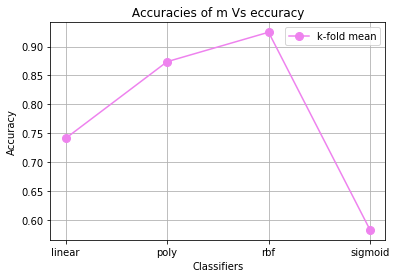

In [321]:
# Plotting the mean accuracies found from cross validtion and test set accuracy
plt.plot(kernels , mean_accuracy_kernels , marker ='o', markersize = 8 , color ='violet',label='k-fold mean')
#plt.plot(range_svm , test_acc,  marker ='o', markersize = 8 , color ='black',label='Test set accuracy')
plt.title(" Accuracies of m Vs eccuracy ")
plt.xlabel("Classifiers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()